In [1]:
import json
tree_data = {
    "node1": {
        #"parent": None,
        "data": "Some data for node1"
    },
    "node2": {
        #"parent": "node1",
        "data": "Some data for node2"
    },
    "node3": {
        "parent": "node1",
        "data": "Some data for node3"
    },
    "node4": {
        "parent": "node3",
        "data": "Some data for node4"
    },
    "node5": {
        "parent": "node3",
        "data": "Some data for node5"
    }
}
print(json.dumps(tree_data, indent=2))

{
  "node1": {
    "data": "Some data for node1"
  },
  "node2": {
    "data": "Some data for node2"
  },
  "node3": {
    "parent": "node1",
    "data": "Some data for node3"
  },
  "node4": {
    "parent": "node3",
    "data": "Some data for node4"
  },
  "node5": {
    "parent": "node3",
    "data": "Some data for node5"
  }
}


In [2]:
import treekit as tk

# load a tree from tree_data
tree = tk.FlatTree(tree_data)
print(json.dumps(tree, indent=2))


{
  "node1": {
    "data": "Some data for node1"
  },
  "node2": {
    "data": "Some data for node2"
  },
  "node3": {
    "parent": "node1",
    "data": "Some data for node3"
  },
  "node4": {
    "parent": "node3",
    "data": "Some data for node4"
  },
  "node5": {
    "parent": "node3",
    "data": "Some data for node5"
  }
}


For now on, when viewing trees, we use the `TreeViz` class to visualize the trees.
It has a `text` and `image` method to display the tree in text and image format respectively.

In [3]:
from treekit.tree_viz import TreeViz
print(TreeViz.text(tree))

__ROOT__
├── node1
│   └── node3
│       ├── node4
│       └── node5
└── node2



In [4]:
TreeViz.image(tree, "tree.png")

Here is the image (`tree.png` from above) of the tree:

![tree](./tree.png)


The `FlatTree` class provides a **view** of a `dict` object as a tree. We do not modify
the `dict` passed into it (and you can create a dict through the `FlatTree` API).

The `FlatTree` class has a number of methods and properties to help you navigate the tree.
A particular aspect of the `FlatTree` class is that it unifies any `dict` object into a tree
structure. The keys are the node names and the values are the node values. If
the value has no parent, it is a child of a `LOGICAL_ROOT` node that is computed
lazily on demand (and is not a part of the actual underlying `dict` object).
In this way, every dict is a tree, and every tree is a dict, with the exception
that undefined behavior may result if the `dict` has keys that map to values
in which a `parent` key is defined but results in a cycle or a node that is not
in the `dict`. In this case, it will still try to work with it, but the behavior
is undefined. You can call `FlatTree.check_valid` to check if the tree is in a
valid state.

TODO: Let values be anything. Right now, they must themselves be `dict` objects,
but this limitation will be removed in the future.

Since it's just a view of a `dict` we have all the normal operations on it that
we would have on a `dict` object.

We can also use the `FlatTree` class to visualize sub-trees rooted at some node.

By default, the `FlatTree` conceptually represents as a whole the logical root
of the tree. However, we have `FlatTree.ProxyNode` objects that can be used to
represent any node in the tree, and supports the same API as the `FlatTree` class
itself.

In [5]:
print(TreeViz.text(tree.get_node("node3")))

node3
├── node4
└── node5



Indeed, we can reprint the logical root of the tree with:

In [6]:
print(TreeViz.text(tree.get_root()))

__ROOT__
├── node1
│   └── node3
│       ├── node4
│       └── node5
└── node2



If you want to see the full state of the tree, we can pass a function argument
to `TreeViz.text` (and `TreeViz.image`) to print the nodes with their values,
or any other information you want to print.

In [7]:
print(TreeViz.text(tree.get_node("node3"), node_name=lambda n: n))

Node('/node3', data='Some data for node3')
├── Node('/node3/node4', data='Some data for node4')
└── Node('/node3/node5', data='Some data for node5')



In [8]:
print(TreeViz.text(tree.get_node("node3"), node_name=lambda n: n.data))

Some data for node3
├── Some data for node4
└── Some data for node5



In [9]:
print(tree["node2"])
node3 = tree.get_node("node3")
print(node3)
print(node3['parent'])
print(node3.children())

{'data': 'Some data for node2'}
ProxyNode(node3: {'parent': 'node1', 'data': 'Some data for node3'})
node1
[ProxyNode(node4: {'parent': 'node3', 'data': 'Some data for node4'}), ProxyNode(node5: {'parent': 'node3', 'data': 'Some data for node5'})]


In [10]:
print(tree.get_root())
for child in tree.get_root().children():
    print(child)

ProxyNode(__ROOT__: {})
ProxyNode(node1: {'data': 'Some data for node1'})
ProxyNode(node2: {'data': 'Some data for node2'})


We show that it's easy to regenerate any JSON files that may have been used
to generate the FlatTree 'tree'. So, JSON is a good format for storing and
transmitting trees. And, of course, `FlatTree` *is* a dictionary. Of course,
if we store an object that has no serializable representation, it cannot be
stored in JSON.

In [11]:
print(json.dumps(tree,  indent=2) == json.dumps(tree_data, indent=2))

True


In [12]:

# let's create a tree from a dict that cannot be serialized to json
non_serializable_tree_data = {
    "node1": {
        #"parent": None,
        # data is a function that cannot be serialized to json
        "data": lambda x: 2*x**3 + 3*x**2 + 4*x + 5
    }
}

non_serializable_tree = tk.FlatTree(non_serializable_tree_data)
print(non_serializable_tree)
print(non_serializable_tree.get_root())

try:
    json.dumps(non_serializable_tree, indent=2)
except TypeError as e:
    print(e)

{'node1': {'data': <function <lambda> at 0x731b9dd4bba0>}}
ProxyNode(__ROOT__: {})
Object of type function is not JSON serializable


In [13]:
child = tree.get_root().add_child(key="node36", data="Some data for node36")
print(child)
tree.get_node("node1").add_child(key="node15", data="Some data for node15")
print(TreeViz.text(tree))

ProxyNode(node36: {'data': 'Some data for node36'})
__ROOT__
├── node1
│   ├── node3
│   │   ├── node4
│   │   └── node5
│   └── node15
├── node2
└── node36



If we try too add a non-unique node key to the tree, we will get a `KeyError`.

In [14]:
try:
    child2 = tree.get_node("node1").add_child(key="node2", data="Some data for node2!!!")
except KeyError as e:
    print(e)

'Node key already exists in the tree'


Let's add some more nodes.

In [15]:

child7 = child.add_child(key="node7", data="Some data for node7")
child7.add_child(key="node17", data="Some data for node17")
child7.add_child(key="node27", data="Some data for node27").add_child(key="node37", data="Some data for node37")
print(TreeViz.text(child7, node_name=lambda n: n))

Node('/node7', data='Some data for node7')
├── Node('/node7/node17', data='Some data for node17')
└── Node('/node7/node27', data='Some data for node27')
    └── Node('/node7/node27/node37', data='Some data for node37')



Let's view the full tree with the `TreeViz.image` method.

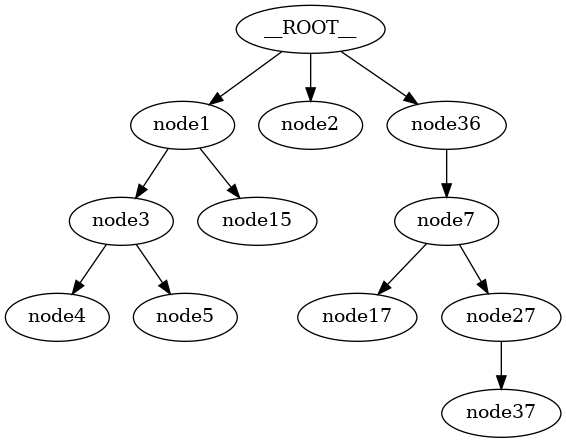

In [16]:
TreeViz.image(tree, "big_tree.png")
from IPython.display import Image
Image("big_tree.png")

We can see that the underlying tree that the child is a member of has been
appropriately modified:

We can iterate over the items of the child and we can modify/delete its data.

In [17]:
for k, v in child7.items():
    print(k)

child7["new_data"] = "Some new data for node7"    
print(child7)

del child7["new_data"]
print(child7)

child7["other_new_data"] = "Some other data for node7"


data
parent
ProxyNode(node7: {'data': 'Some data for node7', 'parent': 'node36', 'new_data': 'Some new data for node7'})
ProxyNode(node7: {'data': 'Some data for node7', 'parent': 'node36'})


Let's create a tree from a dictionary that refers to a non-existent parent.

In [18]:
try:
    non_existent_parent_tree = tk.FlatTree({
        "node1": {
            "parent": "non_existent_parent",
            "data": "Some data for node1"
        }})
    print(TreeViz.text(non_existent_parent_tree, node_name=lambda n: n))
    non_existent_parent_tree.check_valid()
except KeyError as e:
    print(e)



Node('/__ROOT__')

"Parent node non-existent: 'non_existent_parent'"


We see that the node is disconnected from the logical root, since it refers
to a non-existent parent.

In [19]:

try:
    cycle_tree = tk.FlatTree({
        "node0": {
            "parent": None,
            "data": "Some data for node0"
        },
        "node1": {
            "parent": "node2",
            "data": "Some data for node1"
        },
        "node2": {
            "parent": "node3",
            "data": "Some data for node2"
        },
        "node3": {
            "parent": "node1",
            "data": "Some data for node3"
        },
        "node4": {
            "parent": "node0",
            "data": "Some data for node4"
        }
    })

    print(TreeViz.text(cycle_tree, node_name=lambda n: n))
    cycle_tree.check_valid()
except ValueError as e:
    print(e)

Node('/__ROOT__')
└── Node('/__ROOT__/node0', data='Some data for node0')
    └── Node('/__ROOT__/node0/node4', data='Some data for node4')

Cycle detected: {'node3', 'node1', 'node2'}


We see that the tree was in an invalid state. In particular, nodes 1, 2, and 3
are disconnected from the logical root and in a cycle. We can fix this by
breaking the cycle and setting the parent of node 3 to, for instance, the
logical root (by setting it to `None`).

In [20]:
cycle_tree['node3']['parent'] = None
print(TreeViz.text(cycle_tree, node_name=lambda n: n))

Node('/__ROOT__')
├── Node('/__ROOT__/node0', data='Some data for node0')
│   └── Node('/__ROOT__/node0/node4', data='Some data for node4')
└── Node('/__ROOT__/node3', data='Some data for node3')
    └── Node('/__ROOT__/node3/node2', data='Some data for node2')
        └── Node('/__ROOT__/node3/node2/node1', data='Some data for node1')



If you modify the tree structure using the `FlatTree` API, not the `dict` API,
we actually do enforce the tree structure. For example, if we try to set the
parent of a node to a non-existent node, we will get a `KeyError`.

In [21]:
from copy import deepcopy
try:
    deepcopy(tree).get_node("node2")['parent'] = 'node14994'
except KeyError as e:
    print(e)


"Parent node non-existent: 'node14994'"


Let's look at the tree again, and see about creating a cycle.

In [22]:
print(TreeViz.text(tree))

__ROOT__
├── node1
│   ├── node3
│   │   ├── node4
│   │   └── node5
│   └── node15
├── node2
└── node36
    └── node7
        ├── node17
        └── node27
            └── node37



We will make node 1 the parent of node 5, to create a cycle:

In [23]:
try:
    deepcopy(tree).get_node("node1")['parent'] = 'node5'
except ValueError as e:
    print(e)

Cycle detected: {'node1', 'node5', 'node3'}


Notice that we use `deepcopy` to avoid modifying the original tree with these
invalid operations. We chose to do it this way so as to not incur the overhead
of reverting the tree to a valid state after an invalid operation. This way,
we can keep the tree in an invalid state for as long as we want, and only
revert it to a valid state when we want to.

Each node is a key-value pair in the `FlatTree`. We have the  `FlatTree.ProxyNode`
so that we can have an API focused on the nodes and not the underlying dictionary.
However, we stiill permit access to the underlying dictionary. When you modify
the tree in this way, we still maintain the integrity of the tree.

Since the `FlatTree` represents nodes as key-value pairs, and the value may
have a parent key, along with any other arbitrary data, each value for a node
must be a dictionary.

TODO: We are changing this so that the value can be anything, not just a dictionary.

Below, we see that trying to add a `test` node with a non-dictionary value
generates an error.

In [24]:
try:
    error_tree = deepcopy(tree)
    error_tree['test'] = "Some test data"
    error_tree.check_valid()
except ValueError as e:
    print(e)


Node test's value must be a dictionary: value='Some test data'


Let's manipulate the tree a bit more using the `dict` API. We're just going to
add a `new_node` with some data.

In [25]:

tree['new_node'] = {'parent': 'node1', 'data': 'Some new data'}
print(TreeViz.text(tree))

__ROOT__
├── node1
│   ├── node3
│   │   ├── node4
│   │   └── node5
│   ├── node15
│   └── new_node
├── node2
└── node36
    └── node7
        ├── node17
        └── node27
            └── node37



In [26]:
print(json.dumps(tree, indent=2))


{
  "node1": {
    "data": "Some data for node1"
  },
  "node2": {
    "data": "Some data for node2"
  },
  "node3": {
    "parent": "node1",
    "data": "Some data for node3"
  },
  "node4": {
    "parent": "node3",
    "data": "Some data for node4"
  },
  "node5": {
    "parent": "node3",
    "data": "Some data for node5"
  },
  "node36": {
    "data": "Some data for node36"
  },
  "node15": {
    "data": "Some data for node15",
    "parent": "node1"
  },
  "node7": {
    "data": "Some data for node7",
    "parent": "node36",
    "other_new_data": "Some other data for node7"
  },
  "node17": {
    "data": "Some data for node17",
    "parent": "node7"
  },
  "node27": {
    "data": "Some data for node27",
    "parent": "node7"
  },
  "node37": {
    "data": "Some data for node37",
    "parent": "node27"
  },
  "new_node": {
    "parent": "node1",
    "data": "Some new data"
  }
}


The logical root node is not a part of the underlying dictionary, so we can't
access it through the `dict` API. It's non-children data are also immutable
through the `FlatTree` API.

In [27]:
root_node = tree.get_root()
print(root_node)

try:
    root_node['data'] = "Some new data for root node"
except TypeError as e:
    print(e)

try:
    root_node['parent'] = None
except TypeError as e:
    print(e)

try:
    root_node.clear()
except TypeError as e:
    print(e)


ProxyNode(__ROOT__: {})
ProxyNode(__ROOT__: {}) is immutable
ProxyNode(__ROOT__: {}) is immutable


We can *detach* nodes. Let's first view the full tree, pre-detachment. We'll
also make a copy of it so we can come back to it later.

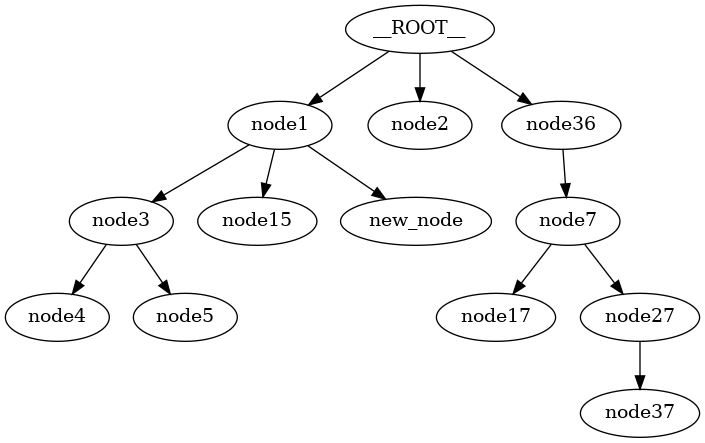

In [28]:
tree_copy = deepcopy(tree)
TreeViz.image(tree, "full-tree-pre-detach-or-prune.png")
Image("full-tree-pre-detach-or-prune.png")


Let's detach node 36 and see the tree.

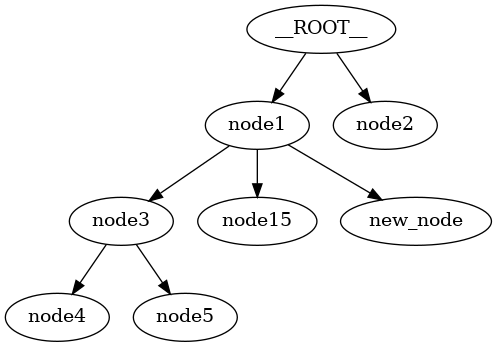

In [29]:
tree.get_node("node36").detach()
TreeViz.image(tree, "full-tree-post-detach-node-36.png")
Image("full-tree-post-detach-node-36.png")

We see that node 36 (and any of its children) are no longer attached to the logical root, which represents the root of the tree.
However, it's not gone -- it's detached. We can view it with:

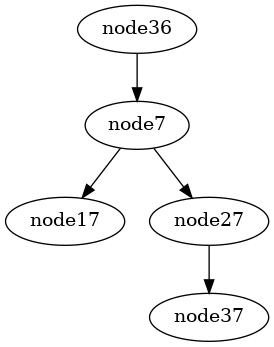

In [30]:
node36 = tree.get_node("node36")
TreeViz.image(node36, "node-36-pre-prune.png")
Image("node-36-pre-prune.png")

We can *prune* any detached nodes. Let's prune node 36.

In [32]:
tree.prune("node36")
print(json.dumps(tree, indent=2)) 

node=ProxyNode(node1: {'data': 'Some data for node1'})
node=ProxyNode(node3: {'parent': 'node1', 'data': 'Some data for node3'})
node=ProxyNode(node4: {'parent': 'node3', 'data': 'Some data for node4'})
Deleting node._key='node3'
node=ProxyNode(node5: {'parent': 'node3', 'data': 'Some data for node5'})
Deleting node._key='node1'
node=ProxyNode(node15: {'data': 'Some data for node15', 'parent': 'node1'})
node=ProxyNode(new_node: {'parent': 'node1', 'data': 'Some new data'})
__ROOT__
└── node2



So, after detaching node 36 and pruning node 1, we only have node 2 left in the tree.
We can prune the detached nodes with the `prune_detached` method.

In [33]:
tree.prune_detached()
print(json.dumps(tree, indent=2))
print(TreeViz.text(tree)) 

key='node2'
key='node4'
key='node5'
key='node36'
Pruning detached key='node36'
node=ProxyNode(node36: {'data': 'Some data for node36', 'parent': '__DETACHED__'})
node=ProxyNode(node7: {'data': 'Some data for node7', 'parent': 'node36', 'other_new_data': 'Some other data for node7'})
node=ProxyNode(node17: {'data': 'Some data for node17', 'parent': 'node7'})
Deleting node._key='node7'
node=ProxyNode(node27: {'data': 'Some data for node27', 'parent': 'node7'})
node=ProxyNode(node37: {'data': 'Some data for node37', 'parent': 'node27'})
Deleting node._key='node27'
Deleting node._key='node36'
key='node15'
key='node7'
key='node17'
key='node27'
key='node37'
key='new_node'
{
  "node2": {
    "data": "Some data for node2"
  },
  "node4": {
    "parent": "node3",
    "data": "Some data for node4"
  },
  "node5": {
    "parent": "node3",
    "data": "Some data for node5"
  },
  "node15": {
    "data": "Some data for node15",
    "parent": "node1"
  },
  "node17": {
    "data": "Some data for nod

Of course, we can mutate any other nodes:

In [34]:
tree = tree_copy
tree.get_node("node7").clear()
print(tree.get_node("node7"))
tree.get_node("node7")['new_data'] = "Some new data for node7"
tree.get_node("node7")['other_new_data'] = "Some other data for node7"
tree.get_node("node7").add_child(key="node77", data="Some data for node77")


print(json.dumps(tree, indent=2))
#print(TreeViz.text(tree, node_name=lambda n: n))

ProxyNode(node7: {})
{
  "node1": {
    "data": "Some data for node1"
  },
  "node2": {
    "data": "Some data for node2"
  },
  "node3": {
    "parent": "node1",
    "data": "Some data for node3"
  },
  "node4": {
    "parent": "node3",
    "data": "Some data for node4"
  },
  "node5": {
    "parent": "node3",
    "data": "Some data for node5"
  },
  "node36": {
    "data": "Some data for node36"
  },
  "node15": {
    "data": "Some data for node15",
    "parent": "node1"
  },
  "node7": {
    "new_data": "Some new data for node7",
    "other_new_data": "Some other data for node7"
  },
  "node17": {
    "data": "Some data for node17",
    "parent": "node7"
  },
  "node27": {
    "data": "Some data for node27",
    "parent": "node7"
  },
  "node37": {
    "data": "Some data for node37",
    "parent": "node27"
  },
  "new_node": {
    "parent": "node1",
    "data": "Some new data"
  },
  "node77": {
    "data": "Some data for node77",
    "parent": "node7"
  }
}


The above only cleans its "cargo" data but it still has the same children.

In [35]:
tree.get_root().add_child(whatever=3).add_child(whatever=4).add_child(whatever=5)
print(json.dumps(tree, indent=2))

{
  "node1": {
    "data": "Some data for node1"
  },
  "node2": {
    "data": "Some data for node2"
  },
  "node3": {
    "parent": "node1",
    "data": "Some data for node3"
  },
  "node4": {
    "parent": "node3",
    "data": "Some data for node4"
  },
  "node5": {
    "parent": "node3",
    "data": "Some data for node5"
  },
  "node36": {
    "data": "Some data for node36"
  },
  "node15": {
    "data": "Some data for node15",
    "parent": "node1"
  },
  "node7": {
    "new_data": "Some new data for node7",
    "other_new_data": "Some other data for node7"
  },
  "node17": {
    "data": "Some data for node17",
    "parent": "node7"
  },
  "node27": {
    "data": "Some data for node27",
    "parent": "node7"
  },
  "node37": {
    "data": "Some data for node37",
    "parent": "node27"
  },
  "new_node": {
    "parent": "node1",
    "data": "Some new data"
  },
  "node77": {
    "data": "Some data for node77",
    "parent": "node7"
  },
  "afd84b8e-0b5f-4936-b7c6-d96b7fb0c484": {
  

In [36]:
simple_tree = tk.FlatTree({
    "root": {
        "data": "Some data for root",
        #"parent": None
    },
    "child1": {
        "data": "Some data for child1",
        "parent": "root"
    },
    "child2": {
        "data": "Some data for child2",
        "parent": "root"
    },
    "child3": {
        "data": "Some data for child3",
        "parent": "child1"
    }
})
print(json.dumps(simple_tree, indent=2))  

{
  "root": {
    "data": "Some data for root"
  },
  "child1": {
    "data": "Some data for child1",
    "parent": "root"
  },
  "child2": {
    "data": "Some data for child2",
    "parent": "root"
  },
  "child3": {
    "data": "Some data for child3",
    "parent": "child1"
  }
}


In [37]:
print(simple_tree.get_root())
print(simple_tree.get_node("child3").get_parent().get_parent())
print(simple_tree.get_node("child3").get_parent().get_parent().get_parent())
print(simple_tree.get_node("child3").get_parent().get_parent().get_parent().get_parent())

ProxyNode(__ROOT__: {})
ProxyNode(root: {'data': 'Some data for root'})
ProxyNode(__ROOT__: {})
None


In [38]:
import treekit.tree_converter as tc
new_tree = tc.TreeConverter.to_treenode(simple_tree.get_root())

print(json.dumps(new_tree, indent=2))

{
  "__name__": "__ROOT__",
  "children": [
    {
      "__name__": "root",
      "data": "Some data for root",
      "children": [
        {
          "__name__": "child1",
          "data": "Some data for child1",
          "parent": "root",
          "children": [
            {
              "__name__": "child3",
              "data": "Some data for child3",
              "parent": "child1",
              "children": []
            }
          ]
        },
        {
          "__name__": "child2",
          "data": "Some data for child2",
          "parent": "root",
          "children": []
        }
      ]
    }
  ]
}


Let's get the meaningful actual root of the tree and map that to a `TreeNode`.
The actual root we labled as `root` is the meaningful root of the tree, the
logical root is just a device used by `FlatTree` to make a forest of trees
look like a single tree. It is the parent of all nodes that have had no parent
assigned to them. In this case, the logical root is the parent of the only
node that has no parent assigned to it -- the node labeled `root`.

In [39]:
print(json.dumps(tc.TreeConverter.to_treenode(simple_tree.get_node("root")), indent=2))

{
  "__name__": "root",
  "data": "Some data for root",
  "children": [
    {
      "__name__": "child1",
      "data": "Some data for child1",
      "parent": "root",
      "children": [
        {
          "__name__": "child3",
          "data": "Some data for child3",
          "parent": "child1",
          "children": []
        }
      ]
    },
    {
      "__name__": "child2",
      "data": "Some data for child2",
      "parent": "root",
      "children": []
    }
  ]
}


In [40]:
testtree = tk.FlatTree()
testtree.get_root()
testtree.get_root().add_child(key="child1", data="Some data for child1")
print(json.dumps(testtree, indent=2))
# when we add a child to the empty root node, the node is turned into the root.
# if we add another child
print(testtree.get_root())

{
  "child1": {
    "data": "Some data for child1"
  }
}
ProxyNode(__ROOT__: {})


In [41]:
tree_node = tk.TreeNode({
    "data": "Some data for root",
    "children": [
        {
            "data": "Some data for child1",
            "children": [
                {
                    "data": "Some data for child3",
                    "children": []
                }
            ]
        },
        {
            "data": "Some data for child2",
            "children": []
        }
    ]
    })
print(TreeViz.text(tree_node.get_root()))

{'data': 'Some data for root', 'children': [{'data': 'Some data for child1', 'children': [{'data': 'Some data for child3', 'children': []}]}, {'data': 'Some data for child2', 'children': []}]}



We see that when we print the node of a `TreeNode`, we get the entire subtree.
If you just want the node:

In [42]:
print(tree_node.get_data())

{'__name__': {'data': 'Some data for root', 'children': [{'data': 'Some data for child1', 'children': [{'data': 'Some data for child3', 'children': []}]}, {'data': 'Some data for child2', 'children': []}]}}


In [43]:
root = tk.TreeNode(data={ "cargo":"root", "more": 4 })
node1 = root.add_child(data={"data": "node1 - child of root"})
node2 = root.add_child(data={"data": "node2 - child of root"})
node3 = node2.add_child(data={"data": "node3 - child of node2"})
#print(json.dumps(root, indent=2))
print(root.name)

{'cargo': 'root', 'more': 4}


In [44]:
flat = tc.TreeConverter.to_flattree
nest = tc.TreeConverter.to_treenode
print(json.dumps(flat(root), indent=2))

{
  "{'cargo': 'root', 'more': 4}": {
    "data": {
      "cargo": "root",
      "more": 4
    }
  },
  "{'data': 'node1 - child of root'}": {
    "data": {
      "data": "node1 - child of root"
    },
    "parent": "{'cargo': 'root', 'more': 4}"
  },
  "{'data': 'node2 - child of root'}": {
    "data": {
      "data": "node2 - child of root"
    },
    "parent": "{'cargo': 'root', 'more': 4}"
  },
  "{'data': 'node3 - child of node2'}": {
    "data": {
      "data": "node3 - child of node2"
    },
    "parent": "{'data': 'node2 - child of root'}"
  }
}


We note that the `TreeNode` class does not need to store a unique key for each
node. It just represents a tree as a recursive data structure, with the
`children` attribute being a list of `TreeNode` objects.

When we convert a `TreeNode` object to a `FlatTree` object, we need to assign
a unique key to each node. By default, it just randomly assigns a key using
UUIDs. If you want a more meaningful key, you can use the `node_name` function
parameter that takes in a `TreeNode` object and returns a string that will be
used as the key.

We know that in the data of the `TreeNode` object, we have a `data` attribute
whose value is a string containing the name of the node concatenated with the
`child of <parent>` string. We can use this to generate a more meaningful key.

In [45]:
node_name=lambda node: node['data'].split()[0] if 'data' in node else None

In [46]:

flat_tree = flat(root, node_name)
print(json.dumps(flat_tree, indent=2))

{
  "5f5c2775-41db-4a07-8820-22d0388313d3": {
    "data": {
      "cargo": "root",
      "more": 4
    }
  },
  "node1": {
    "data": {
      "data": "node1 - child of root"
    },
    "parent": "5f5c2775-41db-4a07-8820-22d0388313d3"
  },
  "node2": {
    "data": {
      "data": "node2 - child of root"
    },
    "parent": "5f5c2775-41db-4a07-8820-22d0388313d3"
  },
  "node3": {
    "data": {
      "data": "node3 - child of node2"
    },
    "parent": "node2"
  }
}


Now let's convert it back to a `TreeNode` object and print it.

In [47]:
root_2 = nest(flat_tree.get_node("root"))
print(json.dumps(root_2, indent=2))


KeyError: "Node not found: 'root'"

We see that each node has an additional `parent` key that was not present in the
original tree. This is because the `FlatTree` object needs to store the parent
of each node so that it can regenerate the tree structure. This is not a problem
because the `TreeNode` object does not use this key to represent the tree structure.
It uses the recursive `children` list. They may be removed, if desired, but
otherwise do not cause any harm.

In [ ]:
root_3 = flat(root_2)
print(json.dumps(root_3, indent=2))


{
  "root": {
    "data": {
      "__name__": "root",
      "data": {
        "data": "root"
      }
    },
    "parent": null
  },
  "node1": {
    "data": {
      "__name__": "node1",
      "data": {
        "data": "node1 - child of root"
      }
    },
    "parent": "root"
  },
  "node2": {
    "data": {
      "__name__": "node2",
      "data": {
        "data": "node2 - child of root"
      }
    },
    "parent": "root"
  },
  "node3": {
    "data": {
      "__name__": "node3",
      "data": {
        "data": "node3 - child of node2"
      }
    },
    "parent": "node2"
  }
}


In [ ]:
print(node_name(flat_tree.get_node("root")))
print(node_name(flat_tree.get_node("node1")))

AttributeError: 'dict' object has no attribute 'split'

In [ ]:
anytree = tc.TreeConverter.to_anytree(flat_tree.get_node("root"))


In [ ]:

# let's pretty-print the anytree node
print(tv.text(anytree, node_name=lambda node: node))
print(tv.text(flat_tree.get_node("root"),
              node_name=lambda node: node))
print(tv.text(flat_tree.get_node("root")))
              

Node('/root', data='root')
├── Node('/root/node1', data='node1 - child of root')
└── Node('/root/node2', data='node2 - child of root')
    └── Node('/root/node2/node3', data='node3 - child of node2')

Node('/root', data='root')
├── Node('/root/node1', data='node1 - child of root')
└── Node('/root/node2', data='node2 - child of root')
    └── Node('/root/node2/node3', data='node3 - child of node2')

root
├── node1
└── node2
    └── node3



In [ ]:
tv.image(anytree,
         filename="anytree.png")
tv.image(flat_tree.get_node("root"),
         filename="flattree.png", maxlevel=2)
tv.image(root,
         filename="treenode.png",
         node_name=lambda n: n.data)
tv.image(root,
         filename="treenode2.png")

tv.image(root, filename="treenode.dot", node_name=lambda n: n.data)